In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('Hospital ER_Data.csv')
df.head(2)

,Patient Id,Patient Admission Date,Patient First Inital,Patient Last Name,Patient Gender,Patient Age,Patient Race,Department Referral,Patient Admission Flag,Patient Satisfaction Score,Patient Waittime,Patients CM
0,145-39-5406,20-03-2024 08:47,H,Glasspool,M,69,White,NaN,False,10.0,39,0
1,316-34-3057,15-06-2024 11:29,X,Methuen,M,4,Native American/Alaska Native,NaN,True,NaN,27,0


In [4]:
df.isnull().sum()

,0
Patient Id,0
Patient Admission Date,0
Patient First Inital,0
Patient Last Name,0
Patient Gender,0
Patient Age,0
Patient Race,0
Department Referral,5400
Patient Admission Flag,0
Patient Satisfaction Score,6699


In [21]:
df.dtypes

,0
Patient Id,object
Patient Admission Date,object
Patient First Inital,object
Patient Last Name,object
Patient Gender,object
Patient Age,int64
Patient Race,object
Department Referral,object
Patient Admission Flag,bool
Patient Satisfaction Score,float64


#🏥 Admission Analysis

In [6]:
no_of_patients=len(df['Patient Id'])
no_of_patients

9216

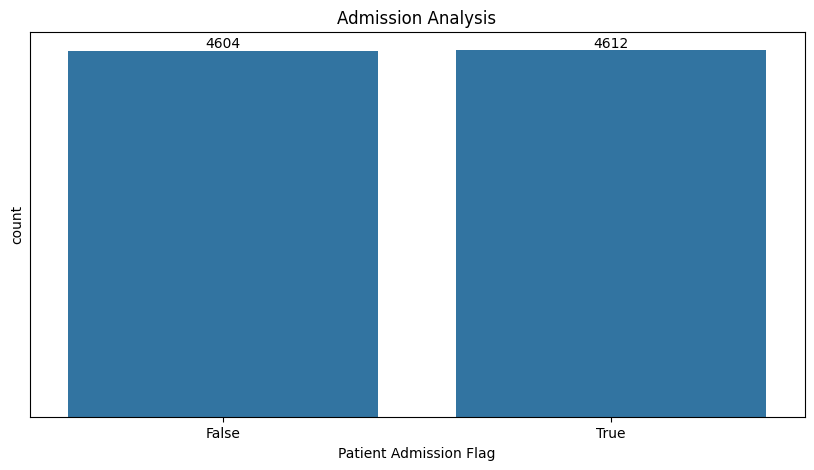

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
ax=sns.countplot(x='Patient Admission Flag',data=df)


for bars in ax.containers:
    ax.bar_label(bars)

plt.yticks([])
plt.title('Admission Analysis')
plt.show()

In [30]:
df['Patient Gender'].value_counts()

,count
Patient Gender,
M,4705
F,4487
NC,24


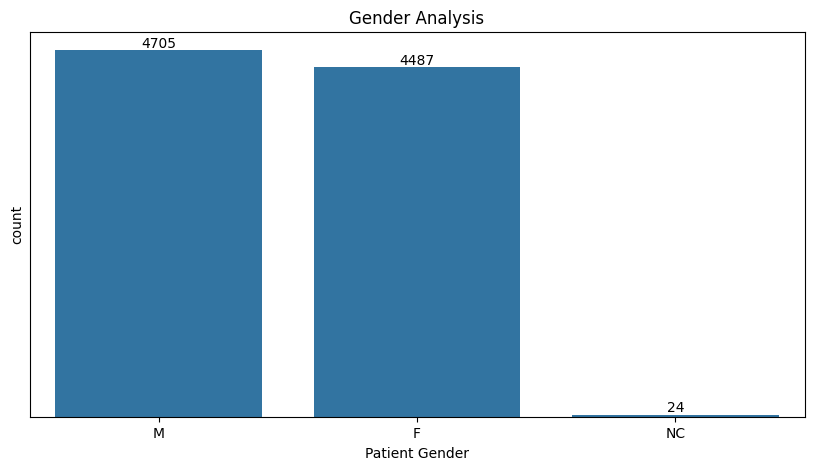

In [133]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Patient Gender',data=df)


for bars in ax.containers:
    ax.bar_label(bars)

plt.yticks([])
plt.title('Gender Analysis')
plt.show()

In [41]:
df.groupby('Patient Gender')['Patient Admission Flag'].value_counts()

Patient Gender  Patient Admission Flag
F               True                      2250
                False                     2237
M               True                      2355
                False                     2350
NC              False                       17
                True                         7
Name: count, dtype: int64

In [52]:
df.groupby('Patient Gender')['Patient Admission Flag'].value_counts().reset_index()

,Patient Gender,Patient Admission Flag,count
0,F,True,2250
1,F,False,2237
2,M,True,2355
3,M,False,2350
4,NC,False,17
5,NC,True,7


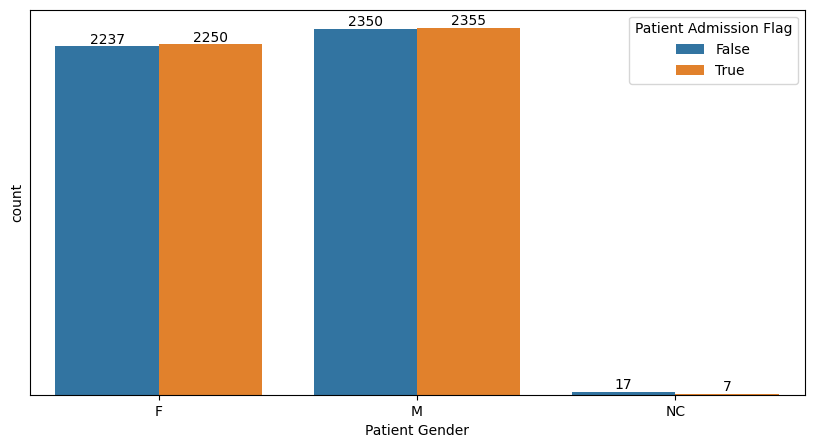

In [134]:
admitted_patients=df.groupby('Patient Gender')['Patient Admission Flag'].value_counts().reset_index()

plt.figure(figsize=(10,5))
ax=sns.barplot(x='Patient Gender',y='count',data=admitted_patients,hue='Patient Admission Flag')

for bars in ax.containers:
    ax.bar_label(bars)

plt.yticks([])


plt.show()

In [54]:
df.head(2)

,Patient Id,Patient Admission Date,Patient First Inital,Patient Last Name,Patient Gender,Patient Age,Patient Race,Department Referral,Patient Admission Flag,Patient Satisfaction Score,Patient Waittime,Patients CM
0,145-39-5406,20-03-2024 08:47,H,Glasspool,M,69,White,NaN,False,10.0,39,0
1,316-34-3057,15-06-2024 11:29,X,Methuen,M,4,Native American/Alaska Native,NaN,True,NaN,27,0


In [55]:
df['Department Referral'].value_counts()

,count
Department Referral,
General Practice,1840
Orthopedics,995
Physiotherapy,276
Cardiology,248
Neurology,193
Gastroenterology,178
Renal,86


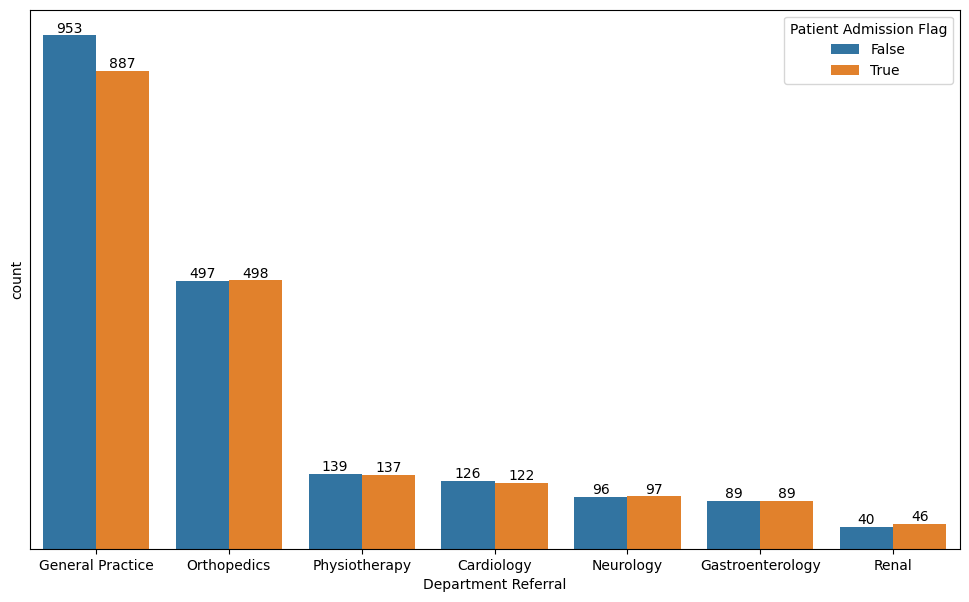

In [71]:
admitted_by_referral=df.groupby('Department Referral')['Patient Admission Flag'].value_counts().reset_index().sort_values(by='count',ascending=False)

plt.figure(figsize=(12,7))
ax=sns.barplot(x='Department Referral',y='count',data=admitted_by_referral,hue='Patient Admission Flag')

for bars in ax.containers:
    ax.bar_label(bars)

plt.yticks([])
plt.show()

([], [])

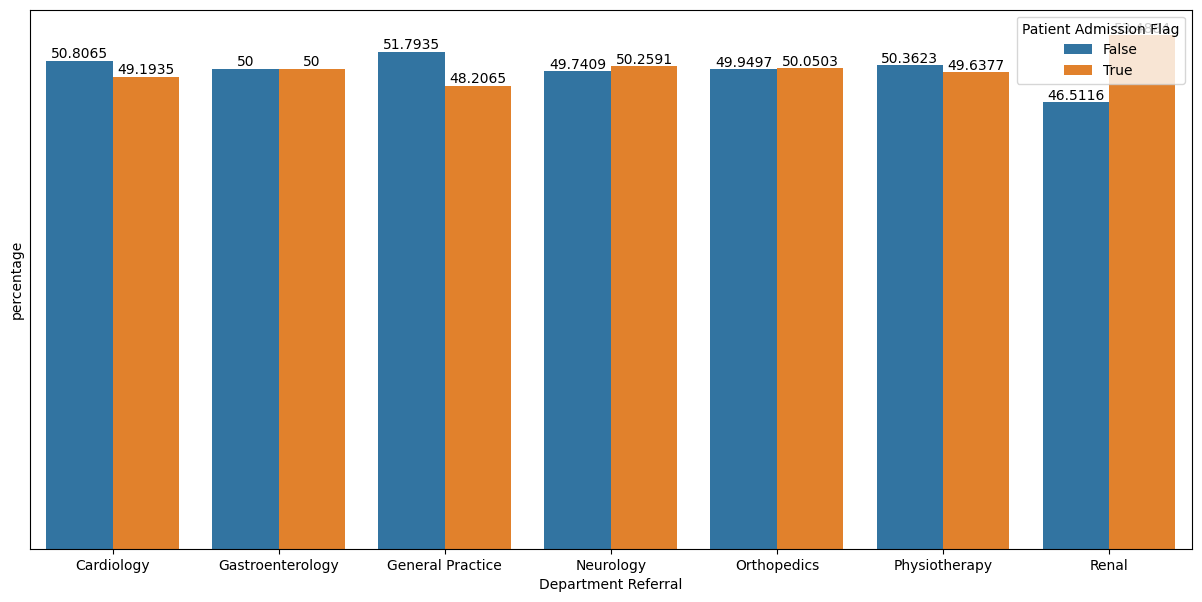

In [89]:
new_df = df.groupby('Department Referral')['Patient Admission Flag'].value_counts().reset_index(name='count')
new_df['total'] = new_df['Department Referral'].map(df['Department Referral'].value_counts())
new_df['percentage'] = (new_df['count'] / new_df['total']) * 100
new_df

plt.figure(figsize=(15,7))
ax=sns.barplot(x='Department Referral',y='percentage',data=new_df,hue='Patient Admission Flag')

for bars in ax.containers:
    ax.bar_label(bars)

plt.yticks([])

# ⏳ Waiting Time Analysis


In [101]:
total_waiting_time=sum(df['Patient Waittime'])
total_waiting_time

avg_waiting_time=df['Patient Waittime'].mean()
print(f"The average patient wait time is {round(avg_waiting_time,2)} minutes")

The average patient wait time is 35.26 minutes


In [116]:
sum_mean_waittime=df.groupby('Patient Gender')['Patient Waittime'].agg(['sum','mean']).reset_index().sort_values(by='mean',ascending=False)
sum_mean_waittime


,Patient Gender,sum,mean
2,NC,892,37.166667
1,M,166545,35.397450
0,F,157518,35.105416


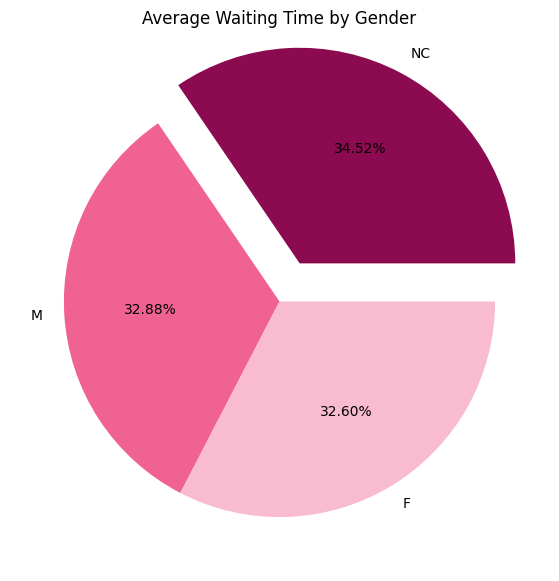

In [126]:
sum_mean_waittime=df.groupby('Patient Gender')['Patient Waittime'].agg(['sum','mean']).reset_index().sort_values(by='mean',ascending=False)
colors=['#8B0A50','#F06292','#F8BBD0']
explode=[0.2,0,0]
plt.figure(figsize=(10,7))
plt.pie(sum_mean_waittime['mean'],labels=sum_mean_waittime['Patient Gender'],autopct='%1.2f%%',explode=explode,colors=colors)
plt.title('Average Waiting Time by Gender')
plt.show()



In [156]:
admitted_non_waittime=df.groupby('Patient Admission Flag')['Patient Waittime'].mean().reset_index()
admitted_non_waittime['Status']=admitted_non_waittime['Patient Admission Flag'].map({True:'Admitted',False:'Non Admitted'})
admitted_non_waittime

,Patient Admission Flag,Patient Waittime,Status
0,False,35.552346,Non Admitted
1,True,34.967910,Admitted


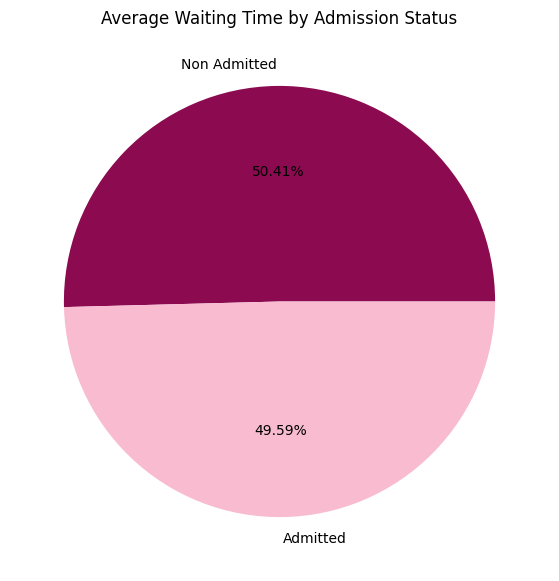

In [158]:
admitted_non_waittime=df.groupby('Patient Admission Flag')['Patient Waittime'].mean().reset_index()
admitted_non_waittime['Status']=admitted_non_waittime['Patient Admission Flag'].map({True:'Admitted',False:'Non Admitted'})

colors=['#8B0A50','#F8BBD0']
plt.figure(figsize=(10,7))
plt.pie(admitted_non_waittime['Patient Waittime'],labels=admitted_non_waittime['Status'],autopct='%1.2f%%',colors=colors)
plt.title('Average Waiting Time by Admission Status')
plt.show()

In [161]:
df.groupby('Department Referral')['Patient Waittime'].mean().reset_index()

,Department Referral,Patient Waittime
0,Cardiology,35.354839
1,Gastroenterology,35.831461
2,General Practice,34.912500
3,Neurology,36.803109
4,Orthopedics,34.982915
5,Physiotherapy,36.565217
6,Renal,34.697674


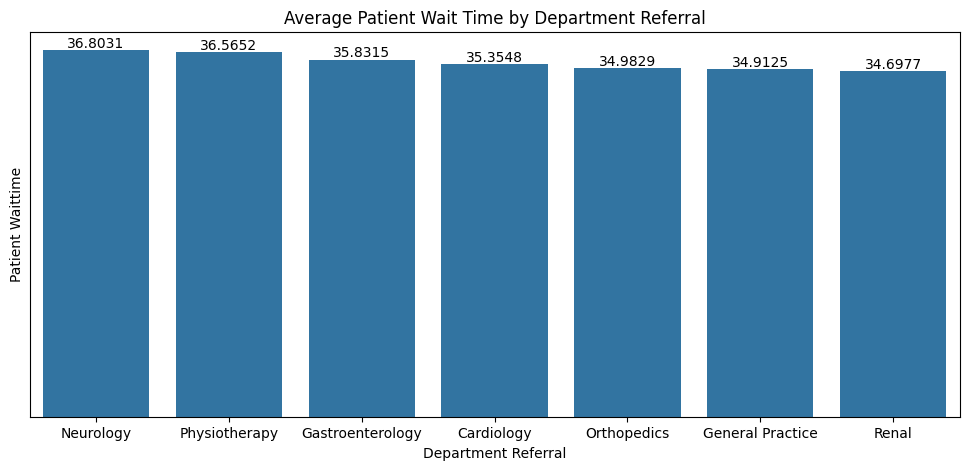

In [174]:
dept_referra_wait_time=df.groupby('Department Referral')['Patient Waittime'].mean().reset_index().sort_values(by='Patient Waittime',ascending=False)

plt.figure(figsize=(12,5))
ax=sns.barplot(x='Department Referral', y='Patient Waittime',data=dept_referra_wait_time)
for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Average Patient Wait Time by Department Referral")
plt.yticks([])
plt.show()

# ⭐ Patient Satisfaction Analysis

In [178]:
avg_patient_satisfaction_score=df['Patient Satisfaction Score'].mean()
print("Average patient satisfaction score:",avg_patient_satisfaction_score)

Average patient satisfaction score: 4.992054032578467


/tmp/ipython-input-2751964132.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wait_sat = df.groupby('Wait_Category')['Patient Satisfaction Score'].mean().reset_index()


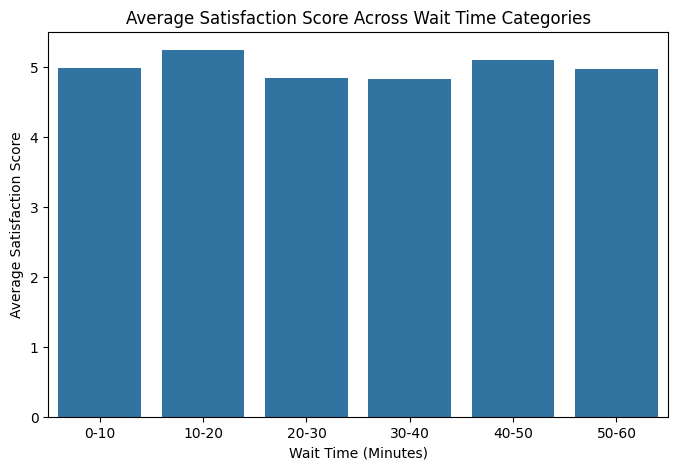

In [225]:
df['Wait_Category'] = pd.cut(
    df['Patient Waittime'],
    bins=[0,10,20,30,40,50,60],
    labels=['0-10','10-20','20-30','30-40','40-50','50-60']
)

wait_sat = df.groupby('Wait_Category')['Patient Satisfaction Score'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Wait_Category', y='Patient Satisfaction Score', data=wait_sat)
plt.title("Average Satisfaction Score Across Wait Time Categories")
plt.xlabel("Wait Time (Minutes)")
plt.ylabel("Average Satisfaction Score")
plt.show()

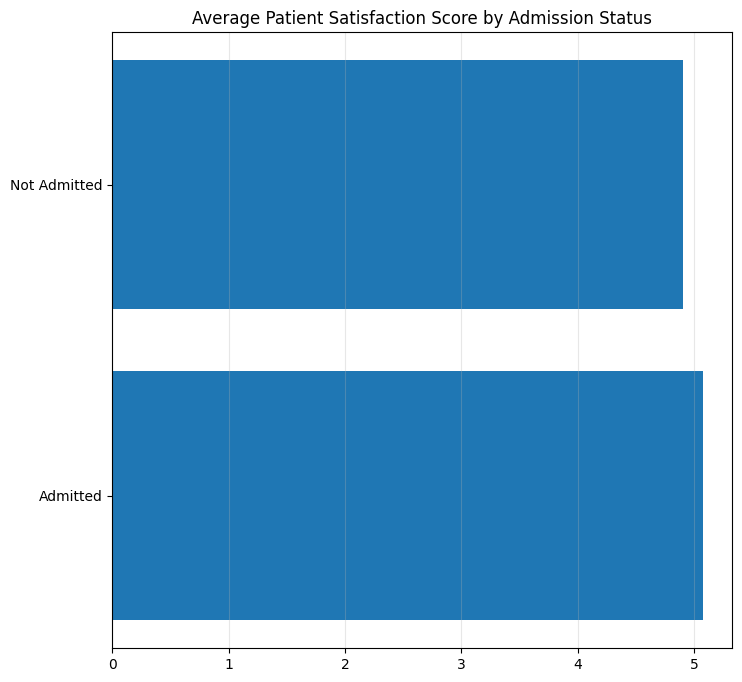

In [223]:
df['status']=df['Patient Admission Flag'].map({True:'Admitted',False:'Not Admitted'})

satisfaction_score=df.groupby('status')['Patient Satisfaction Score'].mean().reset_index()

plt.figure(figsize=(8,8))
ax=plt.barh( y=satisfaction_score['status'],
    width=satisfaction_score['Patient Satisfaction Score'])

plt.title("Average Patient Satisfaction Score by Admission Status")
plt.grid(axis='x',alpha=0.3)
plt.show()

In [231]:
df['Patient Age'].max()

79

In [232]:
df['Age Group']=pd.cut(
    df['Patient Age'],
    bins=[0,18,30,50,70],
    labels=['0-18','18-30','30-50','50-80']
)
df.head(2)

,Patient Id,Patient Admission Date,Patient First Inital,Patient Last Name,Patient Gender,Patient Age,Patient Race,Department Referral,Patient Admission Flag,Patient Satisfaction Score,Patient Waittime,Patients CM,Wait_Category,status,Age Group
0,145-39-5406,20-03-2024 08:47,H,Glasspool,M,69,White,NaN,False,10.0,39,0,30-40,Not Admitted,50-80
1,316-34-3057,15-06-2024 11:29,X,Methuen,M,4,Native American/Alaska Native,NaN,True,NaN,27,0,20-30,Admitted,0-18


/tmp/ipython-input-3704595856.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction_by_agegrp=df.groupby('Age Group')['Patient Satisfaction Score'].mean().reset_index().sort_values(by='Patient Satisfaction Score',ascending=False)


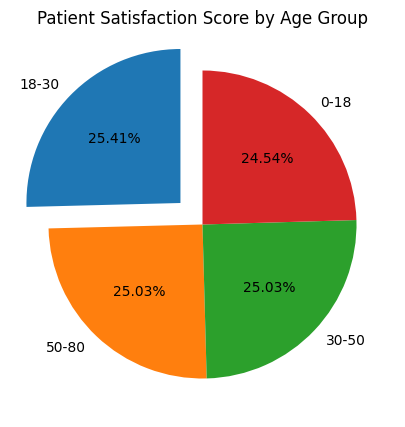

In [234]:
satisfaction_by_agegrp=df.groupby('Age Group')['Patient Satisfaction Score'].mean().reset_index().sort_values(by='Patient Satisfaction Score',ascending=False)
explode=[0.2,0,0,0]
plt.figure(figsize=(8,5))
plt.pie(satisfaction_by_agegrp['Patient Satisfaction Score'],labels=satisfaction_by_agegrp['Age Group'],autopct='%1.2f%%',startangle=90,explode=explode)
plt.title("Patient Satisfaction Score by Age Group")
plt.show()

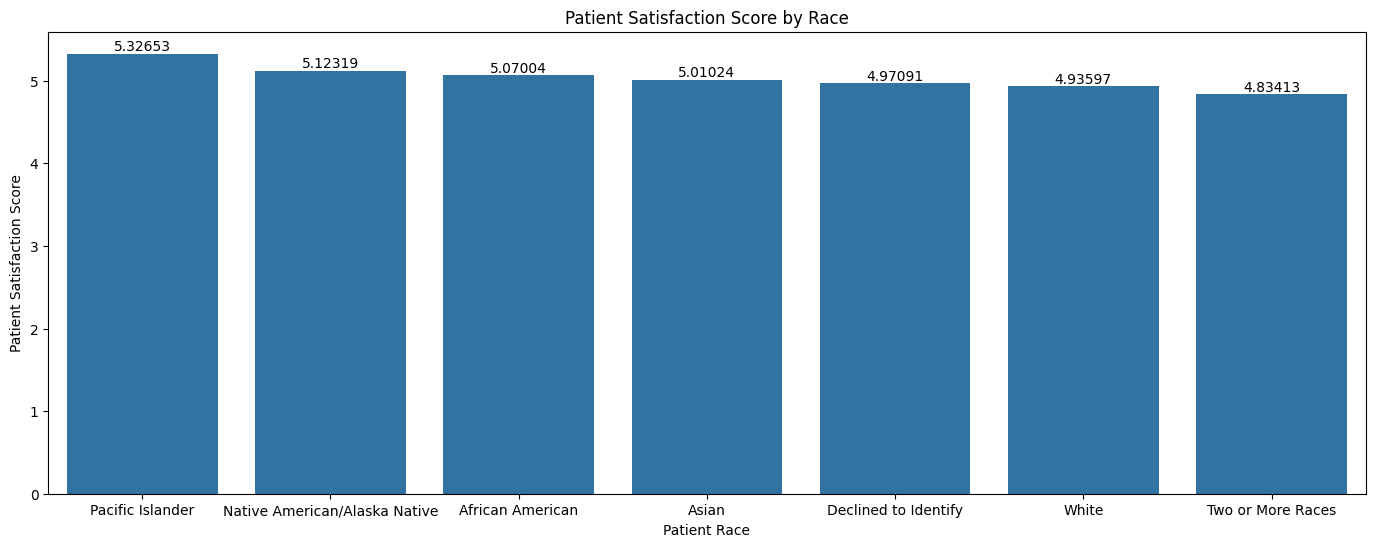

In [241]:
satisfaction_by_race=df.groupby('Patient Race')['Patient Satisfaction Score'].mean().reset_index().sort_values(by='Patient Satisfaction Score',ascending=False)

plt.figure(figsize=(17,6))
ax=sns.barplot(x='Patient Race',y='Patient Satisfaction Score',data=satisfaction_by_race)
for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Patient Satisfaction Score by Race")
plt.show()

# 👥 Demographic Insights

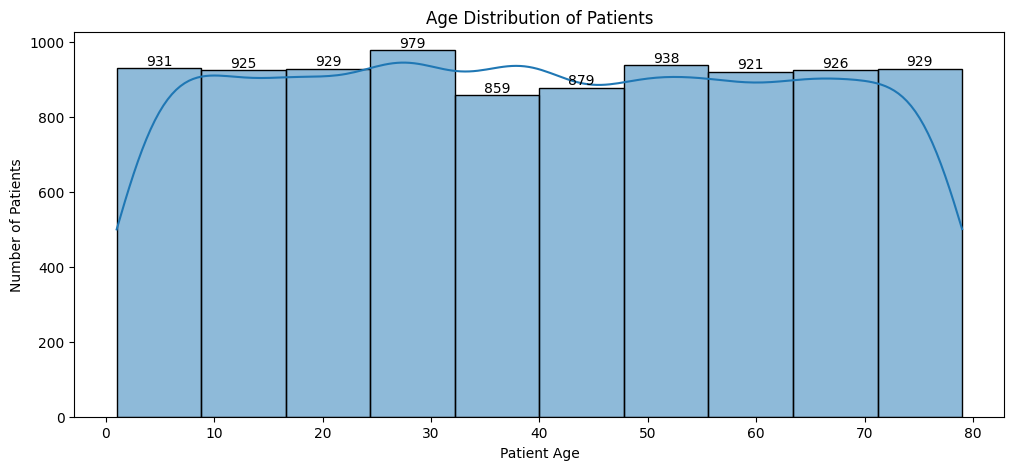

In [246]:
plt.figure(figsize=(12,5))
ax=sns.histplot(df['Patient Age'], bins=10, kde=True)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Age Distribution of Patients")
plt.xlabel("Patient Age")
plt.ylabel("Number of Patients")
plt.show()

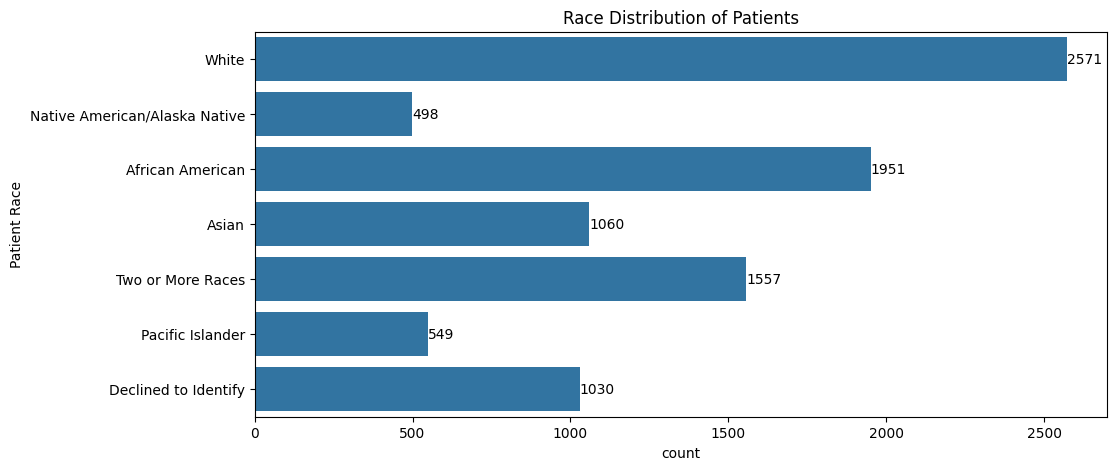

In [256]:
plt.figure(figsize=(11,5))
ax=sns.countplot(df['Patient Race'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Race Distribution of Patients")
plt.show()

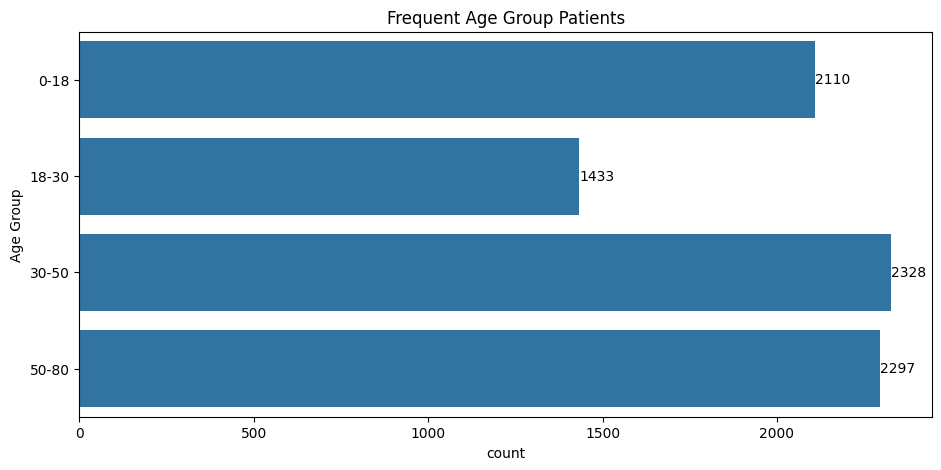

In [262]:
plt.figure(figsize=(11,5))
ax=sns.countplot(df['Age Group'])
for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Frequent Age Group Patients")
plt.show()

In [263]:
df.head(2)

,Patient Id,Patient Admission Date,Patient First Inital,Patient Last Name,Patient Gender,Patient Age,Patient Race,Department Referral,Patient Admission Flag,Patient Satisfaction Score,Patient Waittime,Patients CM,Wait_Category,status,Age Group
0,145-39-5406,20-03-2024 08:47,H,Glasspool,M,69,White,NaN,False,10.0,39,0,30-40,Not Admitted,50-80
1,316-34-3057,15-06-2024 11:29,X,Methuen,M,4,Native American/Alaska Native,NaN,True,NaN,27,0,20-30,Admitted,0-18


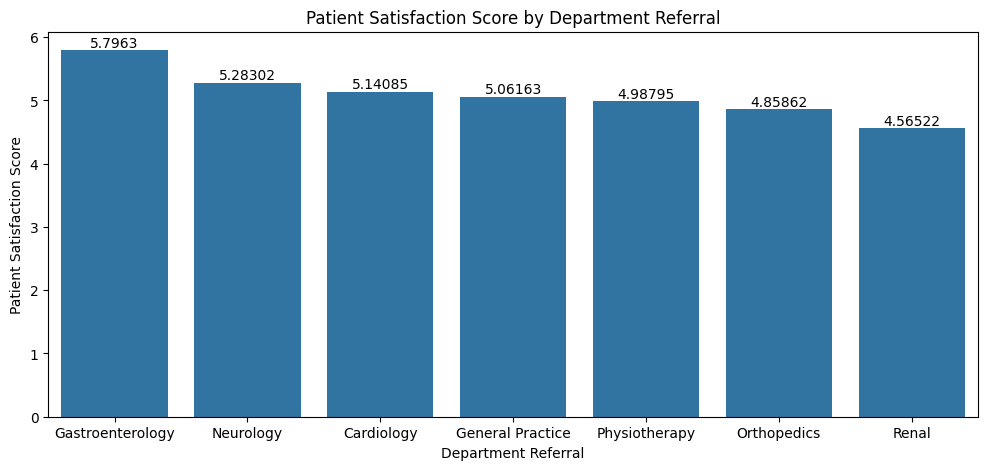

In [266]:
refreed_patient_score=df.groupby('Department Referral')['Patient Satisfaction Score'].mean().reset_index().sort_values(by='Patient Satisfaction Score',ascending=False)

plt.figure(figsize=(12,5))

ax=sns.barplot(x='Department Referral',y='Patient Satisfaction Score',data=refreed_patient_score)
for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Patient Satisfaction Score by Department Referral")
plt.show()

# 📅 Time-Based Trends

In [270]:
df['Patient Admission Date']=pd.to_datetime(df['Patient Admission Date'])

/tmp/ipython-input-4111524920.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Patient Admission Date']=pd.to_datetime(df['Patient Admission Date'])


In [275]:
df['year']=df['Patient Admission Date'].dt.year
df['month']=df['Patient Admission Date'].dt.month
df['day']=df['Patient Admission Date'].dt.day

df['day name']=df['Patient Admission Date'].dt.day_name()
df['month name']=df['Patient Admission Date'].dt.month_name()
df['hour']=df['Patient Admission Date'].dt.hour
df['minutes']=df['Patient Admission Date'].dt.minute
df['seconds']=df['Patient Admission Date'].dt.second

df.head(2)

,Patient Id,Patient Admission Date,Patient First Inital,Patient Last Name,Patient Gender,Patient Age,Patient Race,Department Referral,Patient Admission Flag,Patient Satisfaction Score,...,status,Age Group,year,month,day,day name,month name,hour,minutes,seconds
0,145-39-5406,2024-03-20 08:47:00,H,Glasspool,M,69,White,NaN,False,10.0,...,Not Admitted,50-80,2024,3,20,Wednesday,March,8,47,0
1,316-34-3057,2024-06-15 11:29:00,X,Methuen,M,4,Native American/Alaska Native,NaN,True,NaN,...,Admitted,0-18,2024,6,15,Saturday,June,11,29,0


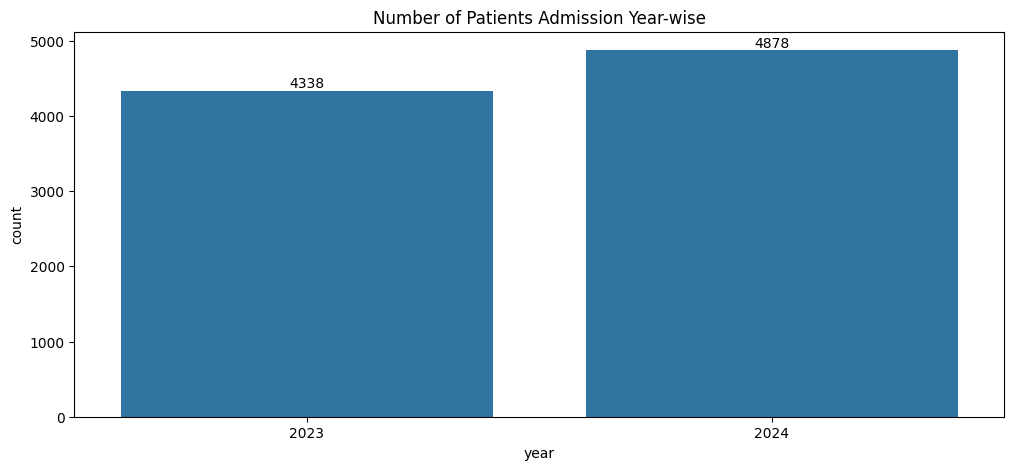

In [282]:
plt.figure(figsize=(12,5))
ax=sns.countplot(x='year',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Number of Patients Admission Year-wise")
plt.show()



/tmp/ipython-input-3146571102.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('month name')['Patient Id'].count().plot()


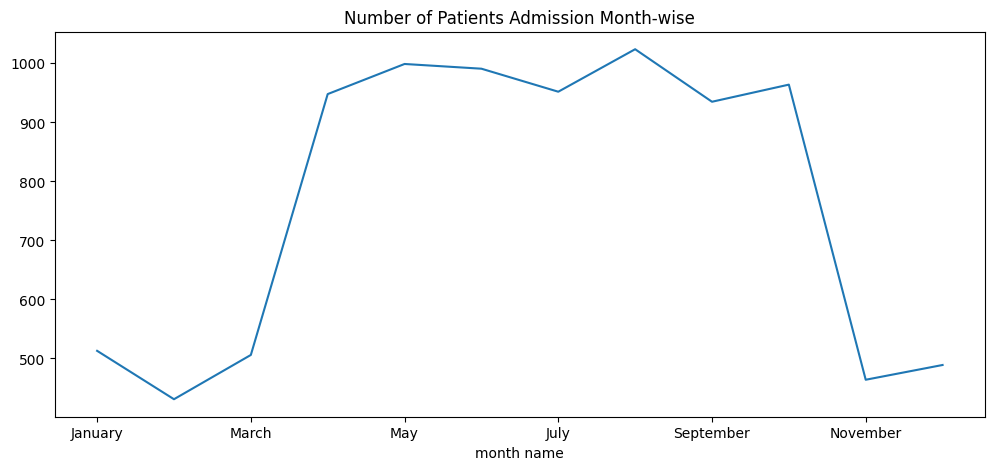

In [289]:
plt.figure(figsize=(12,5))
# Define proper month order
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

# Convert column to ordered category
df['month name'] = pd.Categorical(df['month name'], categories=month_order, ordered=True)
df.groupby('month name')['Patient Id'].count().plot()
plt.title("Number of Patients Admission Month-wise")
plt.show()

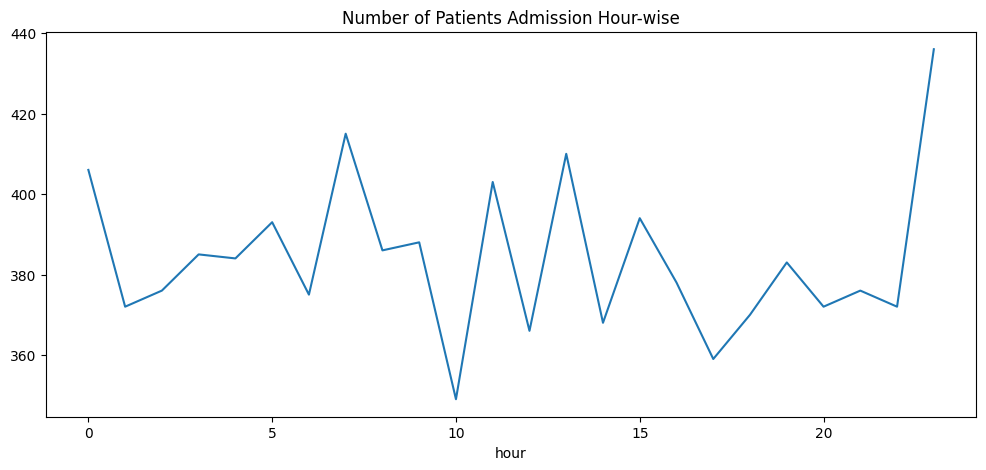

In [294]:
plt.figure(figsize=(12,5))
df.groupby('hour')['Patient Id'].count().plot()
plt.title("Number of Patients Admission Hour-wise")
plt.show()

/tmp/ipython-input-2313930746.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_of_patients_by_hour=df.groupby('hour group')['Patient Id'].count().reset_index()


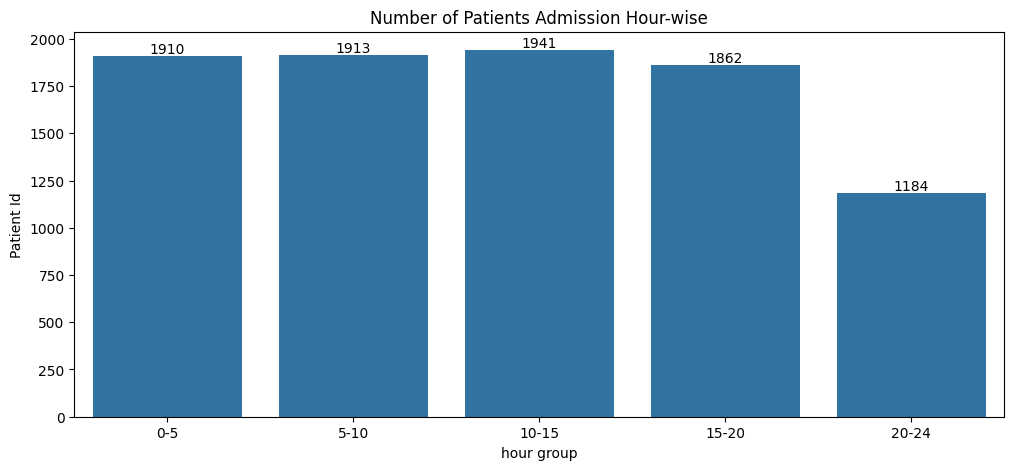

In [296]:
df['hour group']=pd.cut(
    df['hour'],
    bins=[0,5,10,15,20,24],
    labels=['0-5','5-10','10-15','15-20','20-24']
)

plt.figure(figsize=(12,5))
no_of_patients_by_hour=df.groupby('hour group')['Patient Id'].count().reset_index()
ax=sns.barplot(x='hour group',y='Patient Id',data=no_of_patients_by_hour)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Number of Patients Admission Hour-wise")
plt.show()

/tmp/ipython-input-2407127037.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('month name')['Patient Waittime'].mean().plot()


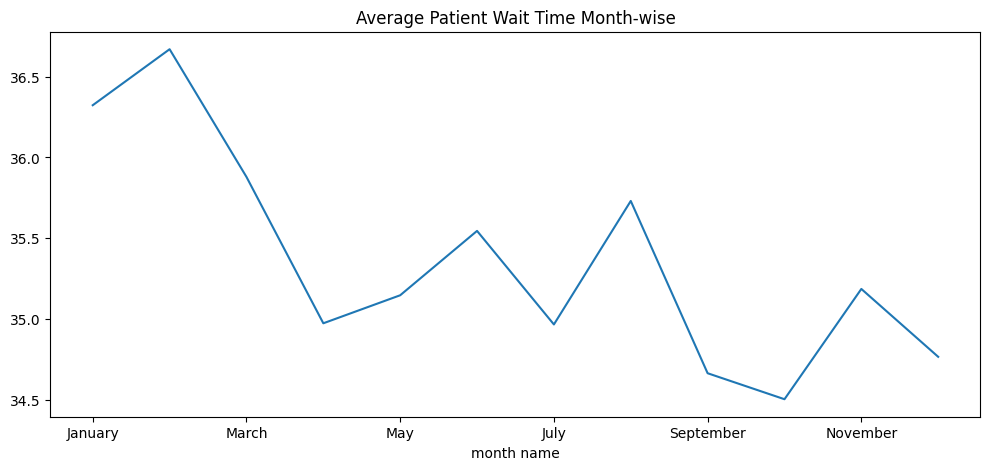

In [300]:
plt.figure(figsize=(12,5))
df.groupby('month name')['Patient Waittime'].mean().plot()
plt.title("Average Patient Wait Time Month-wise")
plt.show()

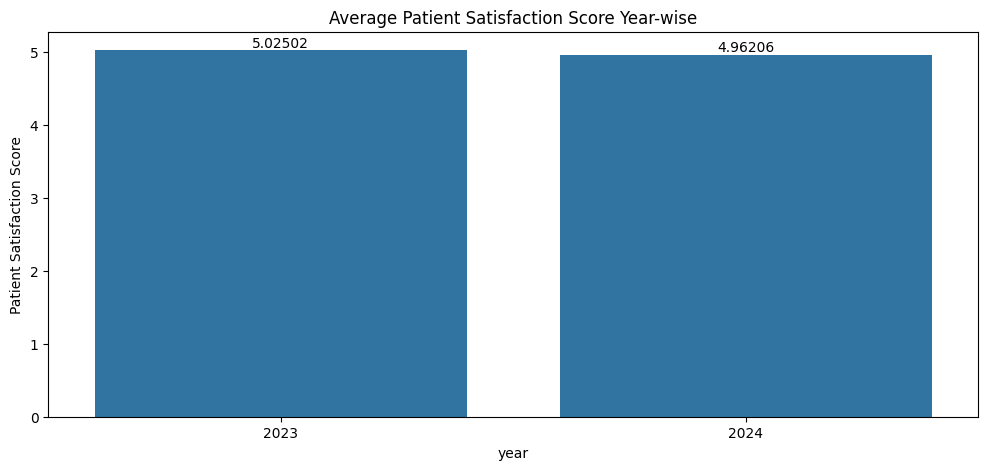

In [306]:
pat_score_by_year=df.groupby('year')['Patient Satisfaction Score'].mean().reset_index()

plt.figure(figsize=(12,5))
ax=sns.barplot(x='year',y='Patient Satisfaction Score',data=pat_score_by_year)
for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Average Patient Satisfaction Score Year-wise")
plt.show()

## conclusion :


*   The hospital handled 9,216 patients, with admissions nearly equally divided between admitted and non-admitted cases.
*   Male and female patients experienced similar admission rates and waiting times, indicating a fair and balanced process.
*   General Practice was the highest referral department, while waiting times remained consistent across departments.
*   Patient admissions increased in 2024 compared to 2023, though overall patient satisfaction showed a slight decline.

